<a href="https://colab.research.google.com/github/Fevzierenn/Reddit-Post-Popularity-Classification-DeepLearning/blob/main/redditPopularityDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import time


In [133]:
df = pd.read_csv('/content/reddit_posts.csv')

In [134]:
df.head()

,id,title,score,upvote_ratio,num_comments,created_utc,is_self,selftext,subreddit
0,1nqkw5r,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,1.758840e+09,False,NaN,technology
1,1nqebg2,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,1.758824e+09,False,NaN,technology
2,1nqigyn,Trump signs executive order to transfer TikTok...,5291,0.94,659,1.758834e+09,False,NaN,technology
3,1nqnqno,Democratic Report Says Disorder at DOGE Jeopar...,1602,0.98,33,1.758848e+09,False,NaN,technology
4,1nqmb8m,1 in 5 Americans now regularly get news on Tik...,1877,0.93,409,1.758844e+09,False,NaN,technology


In [135]:
df.tail()

,id,title,score,upvote_ratio,num_comments,created_utc,is_self,selftext,subreddit
4986,1nhh4nf,I will never understand the slander behind Inc...,0,0.15,7,1.757928e+09,True,"With Incredibles 3 announced, it sparked up di...",movies
4987,1nfv9yv,Did John Ottoman win the Oscar for Bohemian Rh...,220,0.81,86,1.757763e+09,True,In 2019 Bohemian Rhapsody's John Ottman won th...,movies
4988,1ngwb2r,A mixture of Charlie Kaufman and PTA! Suggesti...,0,0.44,4,1.757869e+09,True,"Films like Synecdoche New York, The Master and...",movies
4989,1ng2fz7,"The Night Before The Battle, The Soldiers Sing...",77,0.82,11,1.757782e+09,False,NaN,movies
4990,1nh6p8c,Saw movies,0,0.44,7,1.757894e+09,True,Where can I watch the saw movies? I can’t find...,movies


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4991 non-null   object 
 1   title         4991 non-null   object 
 2   score         4991 non-null   int64  
 3   upvote_ratio  4991 non-null   float64
 4   num_comments  4991 non-null   int64  
 5   created_utc   4991 non-null   float64
 6   is_self       4991 non-null   bool   
 7   selftext      918 non-null    object 
 8   subreddit     4991 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 316.9+ KB


In [137]:
display(df.describe(include="object"))

,id,title,selftext,subreddit
count,4991,4991,918,4991
unique,4991,4969,918,5
top,1nh6p8c,Microsoft blocks Israel’s use of its technolog...,Where can I watch the saw movies? I can’t find...,movies
freq,1,2,1,1000


In [138]:
display(df.describe(include=["int","float"]))

,score,upvote_ratio,num_comments,created_utc
count,4991.000000,4991.000000,4991.000000,4.991000e+03
mean,3490.023843,0.794388,194.077740,1.757442e+09
std,9497.997117,0.227555,674.891186,1.487251e+06
min,0.000000,0.040000,0.000000,1.692927e+09
25%,19.000000,0.700000,7.000000,1.756595e+09
50%,304.000000,0.910000,34.000000,1.757880e+09
75%,2242.500000,0.960000,146.000000,1.758375e+09
max,123894.000000,1.000000,25992.000000,1.758878e+09


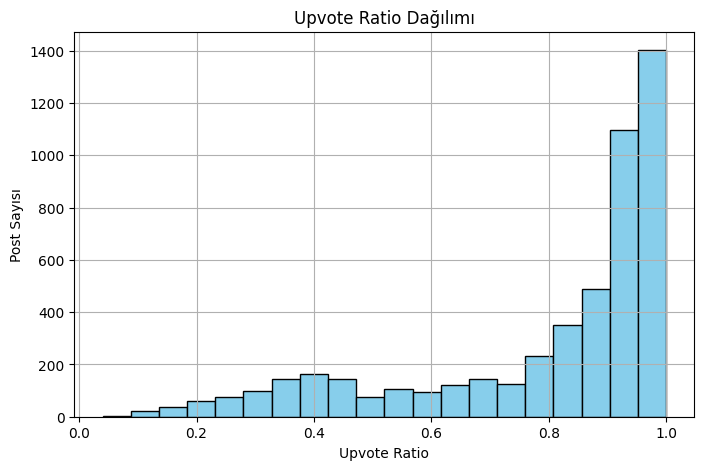

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['upvote_ratio'], bins=20, color='skyblue', edgecolor='black')
plt.title('Upvote Ratio Dağılımı')
plt.xlabel('Upvote Ratio')
plt.ylabel('Post Sayısı')
plt.grid(True)
plt.show()


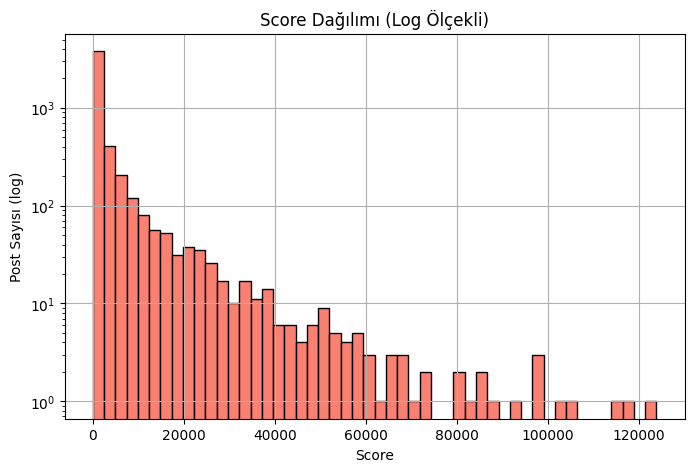

In [140]:
plt.figure(figsize=(8, 5))
plt.hist(df['score'], bins=50, color='salmon', edgecolor='black', log=True)
plt.title('Score Dağılımı (Log Ölçekli)')
plt.xlabel('Score')
plt.ylabel('Post Sayısı (log)')
plt.grid(True)
plt.show()


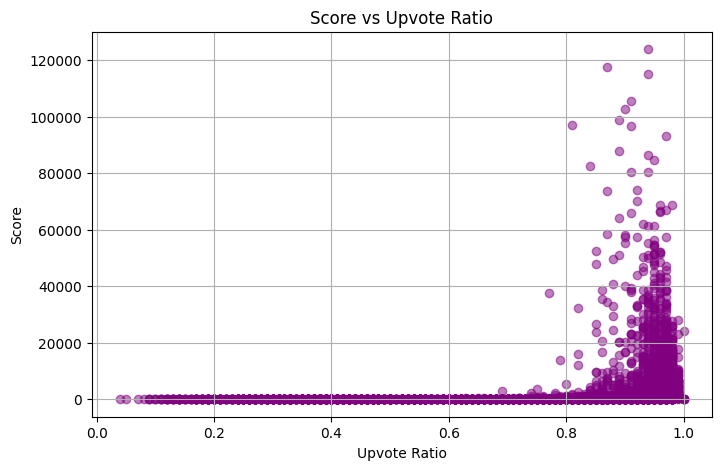

In [141]:
plt.figure(figsize=(8, 5))
plt.scatter(df['upvote_ratio'], df['score'], alpha=0.5, color='purple')
plt.title('Score vs Upvote Ratio')
plt.xlabel('Upvote Ratio')
plt.ylabel('Score')
plt.grid(True)
plt.show()


Classifying each post according to score, upvote ratio, and number of comments

In [142]:
def label_popularity(row):
    if row['score'] > 3000 and row['upvote_ratio'] > 0.8 and row['num_comments'] > 150:
        return 'viral'
    elif row['score'] < 100 or row['num_comments'] < 20:
        return 'not_popular'
    else:
        return 'popular'

df['popularity_level'] = df.apply(label_popularity, axis=1)


create column as popularity_level represents as unpopular - popular - viral -> This will be our dependent variable

In [143]:
df['popularity_level'] = df.apply(label_popularity, axis=1)
df.head()

,id,title,score,upvote_ratio,num_comments,created_utc,is_self,selftext,subreddit,popularity_level
0,1nqkw5r,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,1.758840e+09,False,NaN,technology,viral
1,1nqebg2,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,1.758824e+09,False,NaN,technology,viral
2,1nqigyn,Trump signs executive order to transfer TikTok...,5291,0.94,659,1.758834e+09,False,NaN,technology,viral
3,1nqnqno,Democratic Report Says Disorder at DOGE Jeopar...,1602,0.98,33,1.758848e+09,False,NaN,technology,popular
4,1nqmb8m,1 in 5 Americans now regularly get news on Tik...,1877,0.93,409,1.758844e+09,False,NaN,technology,popular


In [144]:
print(df['popularity_level'].value_counts())


popularity_level
not_popular    2450
popular        1690
viral           851
Name: count, dtype: int64


drop useless columns and seperate Y (popularity_level)
And create df2 to and keep df original form

In [145]:
y = df['popularity_level']
df2 = df.drop(columns=['id','is_self','selftext' , 'popularity_level'])
df2.head(2)

,title,score,upvote_ratio,num_comments,created_utc,subreddit
0,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,1.758840e+09,technology
1,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,1.758824e+09,technology


In [146]:
import pandas as pd

# adjust date type
df2['created_utc'] = pd.to_datetime(df2['created_utc'], unit='s')

# title length
df2['title_length'] = df2['title'].apply(len)

# score per comment
df2['score_per_comment'] = df2['score'] / (df['num_comments'] + 1)

# post time
df2['hour'] = df2['created_utc'].dt.hour

# is it weekend?
df2['is_weekend'] = df2['created_utc'].dt.dayofweek >= 5


In [147]:
df2.head(2)

,title,score,upvote_ratio,num_comments,created_utc,subreddit,title_length,score_per_comment,hour,is_weekend
0,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,2025-09-25 22:39:48,technology,100,31.498024,22,False
1,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,2025-09-25 18:19:00,technology,65,9.300674,18,False


Make strings useful and delete stepwords

In [148]:

import re
import nltk

nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


before adjustment on Strings

In [149]:
title = df2['title']
title.head(2)

,title
0,Alex Jones and Nick Fuentes taken off YouTube ...
1,"Regulating AI hastens the Antichrist, says Pal..."


After adjustment. All words are root form.

In [150]:
titles = []
for m in range(0, len(title)):
    singleTitle =re.sub('[^a-zA-Z]',' ', title[m])
    singleTitle=singleTitle.lower()
    titleList = singleTitle.split()
    titleList = [ps.stem(word) for word in titleList if not word in set(stopwords.words("english"))]
    titleWord = ' '.join(titleList)
    titles.append(titleWord)
print(titles[2])

trump sign execut order transfer tiktok us owner


***Feautre Extraction ( Öznitelik Çıkarımı) & Bag of Words (BOW)***  -> counts how many times a word occurs.

CountVectorizer -> vector

In [151]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
titleVectors = cv.fit_transform(titles).toarray() # bağımsız değişken


now all the titles represents as vector.

In [152]:
print(titleVectors[0])

[0 0 0 ... 0 1 0]


y -> convert to numerical values with using LabelEncoder

In [153]:
y.head(1)


,popularity_level
0,viral


In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)


Now, Y represents numerical and y is numpy array now.

In [155]:
print(y)

[2 2 2 ... 0 0 0]


In [156]:
title_vec_df = pd.DataFrame(titleVectors, columns=cv.get_feature_names_out())

titles are now represented in vector space according to the frequency of use of words


In [157]:
title_vec_df.head(3)

,abc,abil,abort,abus,academ,academi,acceler,access,accid,accord,...,wrong,ye,year,yet,york,young,younger,youth,youtub,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Make subreddit and is_weekend columns numerical

In [158]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['subreddit'] = le.fit_transform(df2['subreddit'])
df2['is_weekend'] = le.fit_transform(df2['is_weekend'])

In [159]:
df2.head(3)

,title,score,upvote_ratio,num_comments,created_utc,subreddit,title_length,score_per_comment,hour,is_weekend
0,Alex Jones and Nick Fuentes taken off YouTube ...,31876,0.95,1011,2025-09-25 22:39:48,4,100,31.498024,22,0
1,"Regulating AI hastens the Antichrist, says Pal...",15188,0.93,1632,2025-09-25 18:19:00,4,65,9.300674,18,0
2,Trump signs executive order to transfer TikTok...,5291,0.94,659,2025-09-25 20:59:16,4,59,8.016667,20,0


Drop useless columns once again.

In [160]:
df2 = df2.drop(columns=['title','created_utc'])
df2.head(2)

,score,upvote_ratio,num_comments,subreddit,title_length,score_per_comment,hour,is_weekend
0,31876,0.95,1011,4,100,31.498024,22,0
1,15188,0.93,1632,4,65,9.300674,18,0


We perform the scale operation to transform the data so that their mean is 0 and their standard deviation is 1. **(X independent variable)**

In [161]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2 = sc.fit_transform(df2)

concat title vector df & remain X df

In [162]:
import numpy as np
X = np.hstack((title_vec_df, df2))  # Final feature matrix

Split data -> train and test

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state=0)

Let's watch the behavior of the data in Logistic regression

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [166]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
acc = accuracy_score(y_test, lr_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.8649


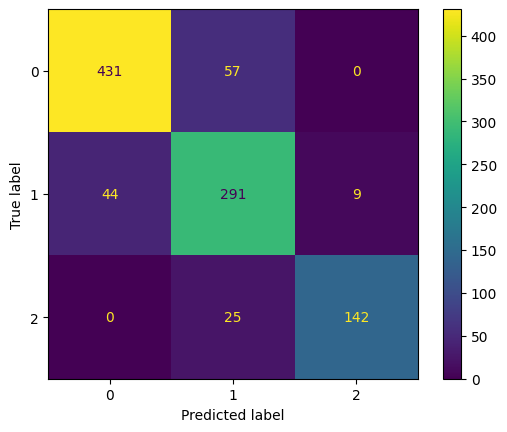

In [167]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [168]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr_pred))


              precision    recall  f1-score   support

           0       0.91      0.88      0.90       488
           1       0.78      0.85      0.81       344
           2       0.94      0.85      0.89       167

    accuracy                           0.86       999
   macro avg       0.88      0.86      0.87       999
weighted avg       0.87      0.86      0.87       999



Perform all the models we can and see what our data behaviour.

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# 2. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(max_depth=10, random_state = 0),
    "Decision Tree": DecisionTreeClassifier(criterion="gini", max_depth = 3 , random_state = 42),
    "SVC": SVC(kernel='rbf',C=1.0),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# 3. Collect accuracy scores
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# 4. Sonuçları yazdır
for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: Accuracy = {acc:.4f}")


Decision Tree: Accuracy = 0.9930
Logistic Regression: Accuracy = 0.8649
SVC: Accuracy = 0.8639
Random Forest: Accuracy = 0.8318
KNN: Accuracy = 0.7217
Naive Bayes: Accuracy = 0.3564


## **Train data with BERT**

In [170]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizerFast, DistilBertModel
from sklearn.metrics import accuracy_score, classification_report

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# =======================
# Dataset
# =======================
class RedditDataset(Dataset):
    def __init__(self, titles, nums, labels, tokenizer, max_len=64):
        self.titles = titles      # list or array
        self.nums = nums.astype("float32")   # numeric array
        self.labels = labels.astype("int64") # label array
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.titles)

    def __getitem__(self, idx):
        enc = self.tokenizer(
            str(self.titles[idx]),
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            "input_ids": enc["input_ids"].squeeze(0),
            "attention_mask": enc["attention_mask"].squeeze(0),
            "nums": torch.tensor(self.nums[idx], dtype=torch.float),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

# =======================
# Model
# =======================
class BertWithNumeric(nn.Module):
    def __init__(self, num_numeric, freeze_bert=True):
        super().__init__()
        self.bert = DistilBertModel.from_pretrained("distilbert-base-uncased")
        if freeze_bert:
            for p in self.bert.parameters():
                p.requires_grad = False
        bert_dim = self.bert.config.hidden_size  # 768
        self.num_mlp = nn.Sequential(
            nn.Linear(num_numeric, 64),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.classifier = nn.Sequential(
            nn.Linear(bert_dim + 64, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 3)  # 3 sınıf
        )

    def forward(self, input_ids, attention_mask, nums):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled = out.last_hidden_state[:,0,:]  # CLS token embedding
        nums_out = self.num_mlp(nums)
        concat = torch.cat([pooled, nums_out], dim=1)
        return self.classifier(concat)

# =======================
# Hazırlık
# =======================
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
MAX_LEN = 64

# title ve numeric ayır
titles_train = x_train[:,0]
nums_train   = x_train[:,1:]
titles_test  = x_test[:,0]
nums_test    = x_test[:,1:]

# Dataset & DataLoader
train_ds = RedditDataset(titles_train, nums_train, y_train, tokenizer, max_len=MAX_LEN)
test_ds  = RedditDataset(titles_test,  nums_test,  y_test,  tokenizer, max_len=MAX_LEN)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

# Model
model = BertWithNumeric(num_numeric=nums_train.shape[1], freeze_bert=True).to(DEVICE)

# Optimizer & Loss
optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=2e-4)
loss_fn = nn.CrossEntropyLoss()

# =======================
# Training Loop
# =======================
train_losses = []
val_losses = []
val_accuracies = []
EPOCHS = 13
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        ids = batch["input_ids"].to(DEVICE)
        mask = batch["attention_mask"].to(DEVICE)
        nums = batch["nums"].to(DEVICE)
        labels = batch["labels"].to(DEVICE)

        logits = model(ids, mask, nums)
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)  # <- buraya ekle
    # Validation
    model.eval()
    preds, trues = [], []
    val_loss = 0
    with torch.no_grad():
        for batch in test_loader:
            ids = batch["input_ids"].to(DEVICE)
            mask = batch["attention_mask"].to(DEVICE)
            nums = batch["nums"].to(DEVICE)
            labels = batch["labels"].to(DEVICE)

            logits = model(ids, mask, nums)

            loss = loss_fn(logits, labels)
            val_loss += loss.item()

            p = logits.argmax(dim=1).cpu().numpy()
            preds.extend(p)
            trues.extend(labels.cpu().numpy())

    val_loss /= len(test_loader)
    acc = accuracy_score(trues, preds)
    val_losses.append(val_loss)
    val_accuracies.append(acc)
    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {avg_loss:.4f} - Val Acc: {acc:.4f}")

print("\nFinal Classification Report:")
print(classification_report(trues, preds, digits=4))


Epoch 1/13 - Train Loss: 0.9707 - Val Acc: 0.6296
Epoch 2/13 - Train Loss: 0.6052 - Val Acc: 0.7888
Epoch 3/13 - Train Loss: 0.3713 - Val Acc: 0.8408
Epoch 4/13 - Train Loss: 0.2786 - Val Acc: 0.8549
Epoch 5/13 - Train Loss: 0.2201 - Val Acc: 0.8659
Epoch 6/13 - Train Loss: 0.1919 - Val Acc: 0.8589
Epoch 7/13 - Train Loss: 0.1703 - Val Acc: 0.8579
Epoch 8/13 - Train Loss: 0.1389 - Val Acc: 0.8509
Epoch 9/13 - Train Loss: 0.1265 - Val Acc: 0.8569
Epoch 10/13 - Train Loss: 0.1078 - Val Acc: 0.8468
Epoch 11/13 - Train Loss: 0.1010 - Val Acc: 0.8519
Epoch 12/13 - Train Loss: 0.0942 - Val Acc: 0.8468
Epoch 13/13 - Train Loss: 0.0894 - Val Acc: 0.8438

Final Classification Report:
              precision    recall  f1-score   support

           0     0.9129    0.8381    0.8739       488
           1     0.7398    0.8430    0.7880       344
           2     0.9057    0.8623    0.8834       167

    accuracy                         0.8438       999
   macro avg     0.8528    0.8478    0.8485 

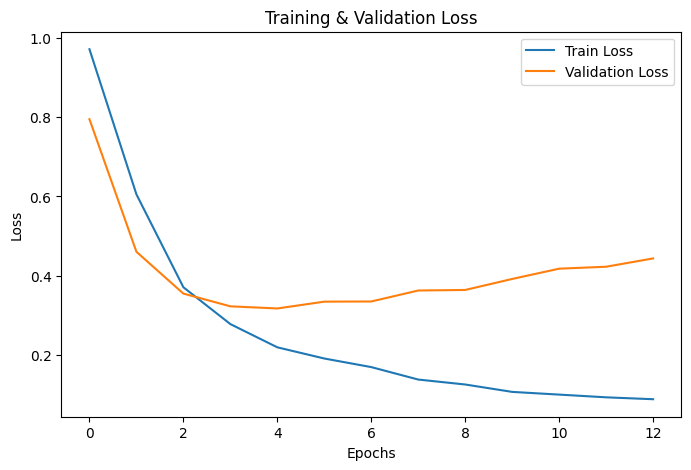

In [171]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()


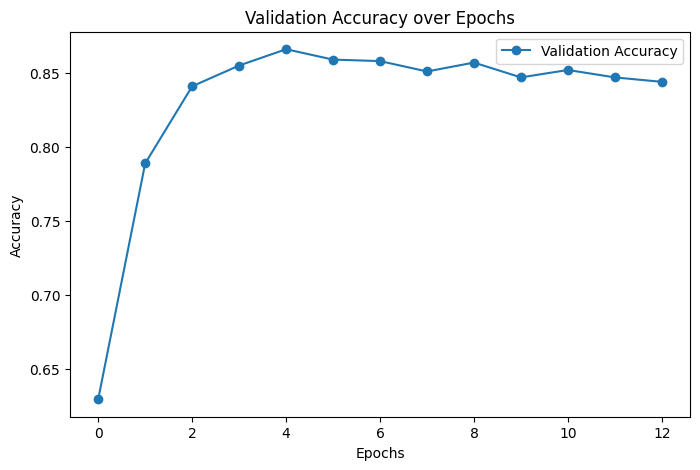

In [172]:
plt.figure(figsize=(8,5))
plt.plot(val_accuracies, marker="o", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy over Epochs")
plt.legend()
plt.show()


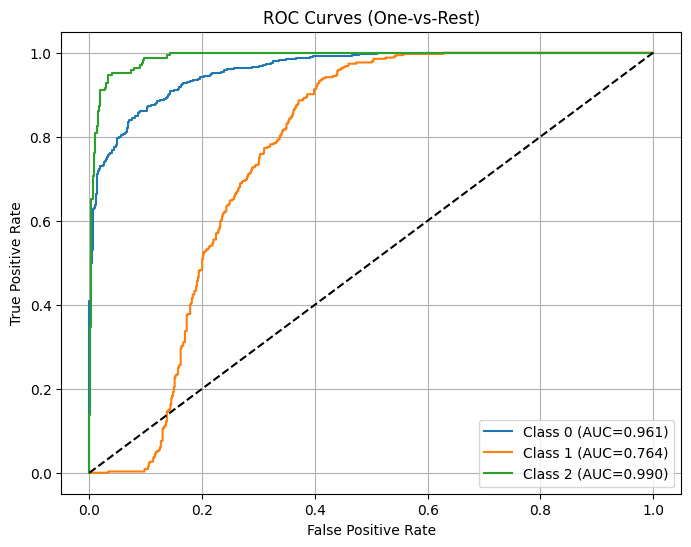

In [173]:
# @title
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Model tahminleri (logitleri) validation set için alalım
model.eval()
all_logits, all_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        ids = batch["input_ids"].to(DEVICE)
        mask = batch["attention_mask"].to(DEVICE)
        nums = batch["nums"].to(DEVICE)
        labels = batch["labels"].cpu().numpy()

        logits = model(ids, mask, nums).cpu().numpy()
        all_logits.append(logits)
        all_labels.append(labels)

all_logits = np.vstack(all_logits)   # shape: (N, num_classes)
all_labels = np.hstack(all_labels)   # shape: (N,)

# Label’leri one-hot’a çevir (multi-class ROC için)
n_classes = all_logits.shape[1]
y_true_bin = label_binarize(all_labels, classes=np.arange(n_classes))

# ROC curve
plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], all_logits[:, i])
    auc = roc_auc_score(y_true_bin[:, i], all_logits[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC={auc:.3f})")

# Random guess çizgisi
plt.plot([0,1], [0,1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest)")
plt.legend()
plt.grid(True)
plt.show()


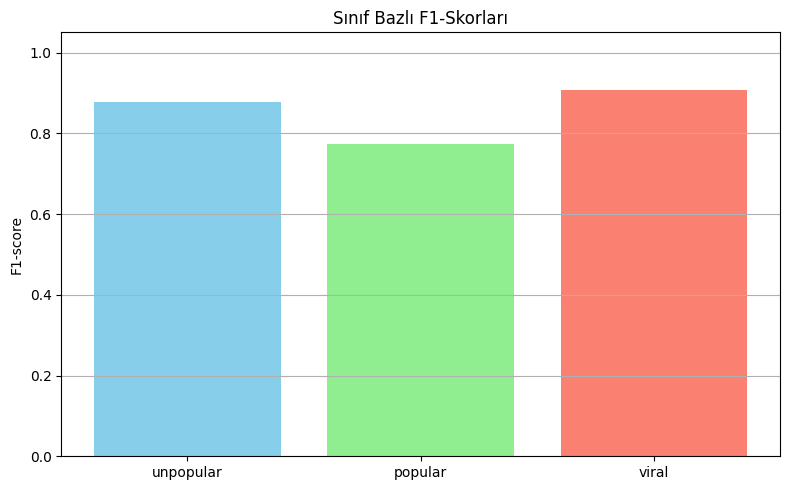

In [174]:
import matplotlib.pyplot as plt

classes = ["unpopular", "popular", "viral"]
f1_scores = [0.8779, 0.7738, 0.9075]

plt.figure(figsize=(8, 5))
plt.bar(classes, f1_scores, color=["skyblue", "lightgreen", "salmon"])
plt.ylim(0, 1.05)
plt.title("Sınıf Bazlı F1-Skorları")
plt.ylabel("F1-score")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


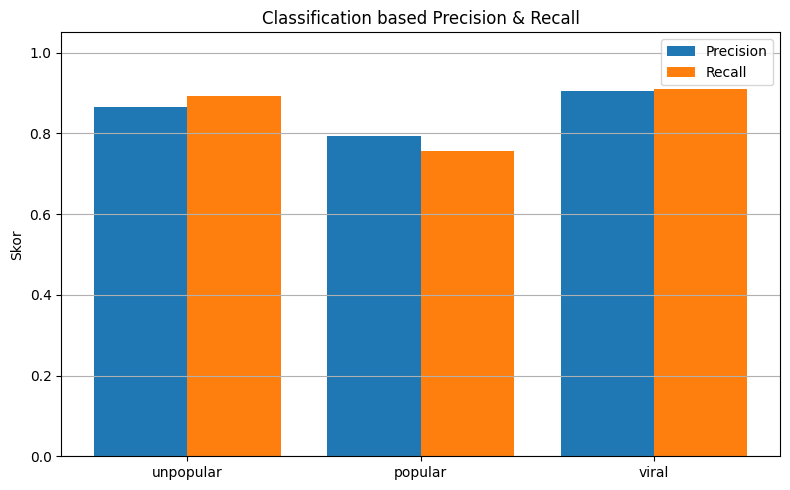

In [175]:
precision = [0.8648, 0.7927, 0.9048]
recall = [0.8914, 0.7558, 0.9102]

x = range(len(classes))
plt.figure(figsize=(8, 5))
plt.bar(x, precision, width=0.4, label='Precision', align='center')
plt.bar([i + 0.4 for i in x], recall, width=0.4, label='Recall', align='center')
plt.xticks([i + 0.2 for i in x], classes)
plt.ylim(0, 1.05)
plt.title("Classification based Precision & Recall")
plt.ylabel("Skor")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [176]:
from sklearn.metrics import accuracy_score, classification_report

# =======================
# Test Evaluation
# =======================
model.load_state_dict(torch.load("best_model.pt"))  # en iyi modeli yükle
model.eval()

test_preds, test_trues = [], []
with torch.no_grad():
    for batch in test_loader:
        ids = batch["input_ids"].to(DEVICE)
        mask = batch["attention_mask"].to(DEVICE)
        nums = batch["nums"].to(DEVICE)
        labels = batch["labels"].to(DEVICE)

        logits = model(ids, mask, nums)
        p = logits.argmax(dim=1).cpu().numpy()
        test_preds.extend(p)
        test_trues.extend(labels.cpu().numpy())

# Accuracy hesapla
test_acc = accuracy_score(test_trues, test_preds)
print(f"📊 Test Accuracy: {test_acc:.4f}")

# Detaylı rapor
print("\nClassification Report (Test Set):")
print(classification_report(test_trues, test_preds, digits=4))


📊 Test Accuracy: 0.4885

Classification Report (Test Set):
              precision    recall  f1-score   support

           0     0.4885    1.0000    0.6564       488
           1     0.0000    0.0000    0.0000       344
           2     0.0000    0.0000    0.0000       167

    accuracy                         0.4885       999
   macro avg     0.1628    0.3333    0.2188       999
weighted avg     0.2386    0.4885    0.3206       999



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
